In [25]:
import os
import requests
from bs4 import BeautifulSoup

import  urllib


def getpic(name):
    # Enter the keywords to be searched and the number of images to be downloaded
    search = name
    num_images = 8

    # Create a folder for storing images
    if not os.path.exists(search):
        os.makedirs(search)
     #search = (name=="dragon")?"龙":name
    
     #else:
        
    # Get the HTML page for Google image search results
    url = "https://www.google.com/search?q={}&tbm=isch".format(search)
    response = requests.get(url)
    soup = BeautifulSoup(response.content, "html.parser")

    # Extract URLs of all images from HTML pages
    image_tags = soup.find_all("img", limit=num_images)
    image_urls = [img["src"] for img in image_tags]

    # Download all images
    for i, url in enumerate(image_urls):
        try:
            print("Downloading image {} of {}".format(i + 2, num_images))
            urllib.request.urlretrieve(url, os.path.join(search, "{}.jpg".format(i + 1)))
        except:
            print("Could not download image {}".format(i + 1))
            
            
getpic("Nosego")
getpic("龙")


Could not download image 1
Could not download image 1


2023-03-21 13:19:11.057926: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


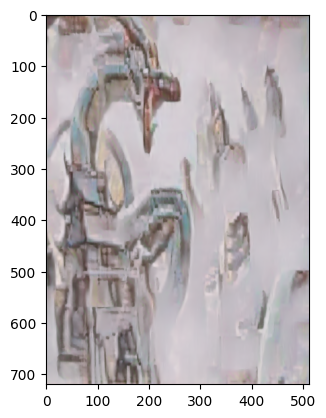

True

In [26]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import PIL.Image
# from tensorflow.keras.preprocessing import image
import tensorflow_hub as hub
import cv2

import random
content_image_path = "./龙/"+str(random.randint(3,8))+".jpg"
style_image_path = "./Nosego/"+str(random.randint(3,8))+".jpg"

content_image = plt.imread(content_image_path)
style_image = plt.imread(style_image_path)

def imshow(image, title=None):
  if len(image.shape) > 3:
    image = tf.squeeze(image, axis=0)

  plt.imshow(image)
  if title:
    plt.title(title)

def image_to_tensor(path_to_img):
    img = tf.io.read_file(path_to_img)
    img = tf.image.decode_image(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)
    img = tf.image.resize(img, [720, 512])
    img = img[tf.newaxis, :]
    return img
content_image_tensor = image_to_tensor(content_image_path)
style_image_tensor = image_to_tensor(style_image_path)


hub_model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')
#Resulted stylized image

stylized_image = hub_model(tf.constant(content_image_tensor), tf.constant(style_image_tensor))[0]
#Viewing the resulted stylized image

plt.imshow(np.squeeze(stylized_image))
plt.show()

#Function for converting a tensor to an image

def tensor_to_image(tensor):
  tensor = tensor*255
  tensor = np.array(tensor, dtype=np.uint8)
  if np.ndim(tensor)>3:
    assert tensor.shape[0] == 1
    tensor = tensor[0]
  return PIL.Image.fromarray(tensor)
#Converting the stylized tensor image to a normal image

normal_stylized_image = tensor_to_image(stylized_image)
#save stylized image

file_name = 'stylized-image.jpg'
cv2.imwrite(file_name, cv2.cvtColor(np.squeeze(normal_stylized_image)*255, cv2.COLOR_BGR2RGB))